# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [3]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

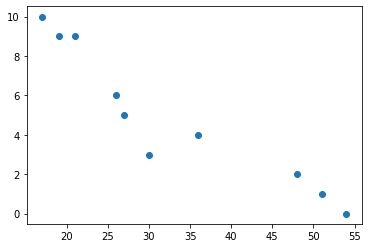

In [40]:
# Your code here.
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(student_data.X, student_data.Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [2]:
# Your response here. 
The younger, the more they are late

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [46]:
# Your response here.
import numpy as np
cov_student_data = np.cov(student_data.X, student_data.Y)
print(cov_student_data)

corr_student_data = student_data.corr()
print(corr_student_data)

#correlation close to 1 so the variables are strongly related

[[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]
          X         Y
X  1.000000 -0.939163
Y -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

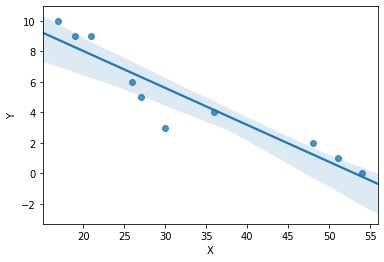

In [48]:
# Your response here.
import seaborn as sns
sns.regplot(x="X", y="Y", data=student_data)
#using linear regression



In [59]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols


model = ols('Y ~ X', data=student_data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           5.57e-05
Time:                        14:44:42   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
import statsmodels.api as sm
X = sm.add_constant(student_data.X) 
Y = student_data.Y
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 09 Sep 2019   Prob (F-statistic):           5.57e-05
Time:                        15:04:43   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [4]:
# Import any libraries you may need & the data
vehicles=pd.read_csv('/Users/sarahpierre-louis/Downloads/vehicles/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [5]:
# Your response here. 
vehicles1 = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].copy()

In [6]:
vehicles1.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [7]:
vehicles1.corr()['CO2 Emission Grams/Mile']
#Fuel Barrels/Year will be the most helpful, Year will be the least helpful

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here. 
sns.pairplot(vehicles1)

NameError: name 'sns' is not defined

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
X = sm.add_constant(vehicles1[['Year','Cylinders','Fuel Barrels/Year','Combined MPG' ,'Fuel Cost/Year']])
Y = vehicles1['CO2 Emission Grams/Mile']
results=sm.OLS(Y,X, data=vehicles1).fit()
results.summary()

In [9]:
#Test Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

In [10]:
X=add_constant(vehicles1)
X.head()

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1.0,1984,4.0,19.388824,17,1950,522.764706
1,1.0,1984,6.0,25.354615,13,2550,683.615385
2,1.0,1985,4.0,20.600625,16,2100,555.437500
3,1.0,1985,6.0,25.354615,13,2550,683.615385
4,1.0,1987,6.0,20.600625,16,2550,555.437500


In [11]:
pd.Series([vif(X.values,i) for i in range(X.shape[1])], index=X.columns)

const                      52043.295653
Year                           1.306864
Cylinders                      2.863604
Fuel Barrels/Year             36.612254
Combined MPG                   7.131523
Fuel Cost/Year                 8.907331
CO2 Emission Grams/Mile       52.283459
dtype: float64

In [18]:
vehicles1.drop('Fuel Barrels/Year',axis=1, inplace=True)

KeyError: "['Fuel Barrels/Year'] not found in axis"

In [19]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
X = sm.add_constant(vehicles1[['Year','Cylinders','Combined MPG' ,'Fuel Cost/Year']])
y = vehicles1['CO2 Emission Grams/Mile']
results=sm.OLS(y,X, data=vehicles1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.929
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                 1.180e+05
Date:                     Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                             10:03:36   Log-Likelihood:            -1.7525e+05
No. Observations:                    35952   AIC:                         3.505e+05
Df Residuals:                        35947   BIC:                         3.506e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2775.8454     35.190     78.881      0.000    2706.871    2844.820
Year              -1.1790      0.018    -65.908      0.000      -1.214      -1.144
Cylinders          6.2030      0.158     39.334      0.000       5.894       6.512
Combined MPG      -9.7038      0.071   -137.610      0.000      -9.842      -9.566
Fuel Cost/Year     0.1141      0.001    146.701      0.000       0.113       0.116
==============================================================================
Omnibus:                     5371.506   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20736.194
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       6.435   Cond. No.                     5.85e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.85e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
pd.Series([vif(X.values,i) for i in range(X.shape[1])], index=X.columns)

const             44362.439771
Year                  1.165965
Cylinders             2.744828
Combined MPG          4.655766
Fuel Cost/Year        5.569866
dtype: float64

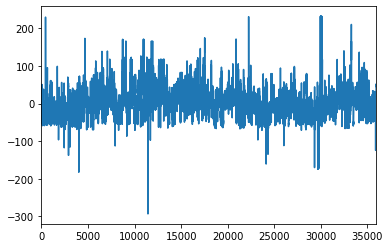

In [21]:
results.resid.plot()

In [22]:
#stardardization
X=(X-X.mean())/X.std()
Y=(y-y.mean())/y.std()

In [23]:
X.drop('const', axis=1, inplace=True)
X=add_constant(X)
result=sm.OLS(y,X).fit()

In [24]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.929
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                 1.180e+05
Date:                     Tue, 10 Sep 2019   Prob (F-statistic):               0.00
Time:                             10:03:52   Log-Likelihood:            -1.7525e+05
No. Observations:                    35952   AIC:                         3.505e+05
Df Residuals:                        35947   BIC:                         3.506e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            475.3163      0.167   2844.901      0.000     474.989     475.644
Year             -11.8906      0.180    -65.908      0.000     -12.244     -11.537
Cylinders         10.8879      0.277     39.334      0.000      10.345      11.430
Combined MPG     -49.6099      0.361   -137.610      0.000     -50.316     -48.903
Fuel Cost/Year    57.8464      0.394    146.701      0.000      57.074      58.619
==============================================================================
Omnibus:                     5371.506   Durbin-Watson:                   0.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20736.194
Skew:                           0.714   Prob(JB):                         0.00
Kurtosis:                       6.435   Cond. No.                         4.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

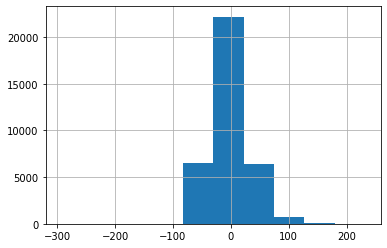

In [25]:
result.resid.hist()  #it means that they are outliers that we can drop

Some ideas to solve the problem:
- drop the outliers
- reconsider the columns (maybe an important column is missing)

In [28]:
X1=X.copy()
X1['resid']=result.resid
X1.corr()['resid']


#no corr between residuals and variables, residuals are not affected by any of the columns
#the values of the residuals are independent and cannot predict them so it is good

const                      NaN
Year              3.576861e-15
Cylinders        -1.788468e-15
Combined MPG      3.533836e-15
Fuel Cost/Year   -4.705638e-15
resid             1.000000e+00
Name: resid, dtype: float64

# RFE

In [30]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
rfe=RFE(model,3)

In [33]:
rfe=rfe.fit(X,y)

In [34]:
print(rfe.support_)

[False  True False  True  True]


In [35]:
X.columns[rfe.support_] #should be 'Combined MPG', 'Fuel Cost/Year','Fuel Barrels/Year'

Index(['Year', 'Combined MPG', 'Fuel Cost/Year'], dtype='object')

In [120]:
X_new=[X.columns[rfe.support_]]

In [121]:
import statsmodels.formula.api as sm

In [122]:
from statsmodels.tools.tools import add_constant

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 